In [279]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
data = pd.read_csv('Lab09_uncleaned_laptopData.csv')

In [280]:
# add a space to ScreenResolution which has no other information
# to search from each row of data if ScreenResolution column has a space?
for x in data.index:
    raw = str(data.loc[x, "ScreenResolution"])
    if (' ' in raw) == False:
        data.loc[x, "ScreenResolution"] = " " + raw
# use 'rsplit()' to split last elements using space as delimeter
data[['ScreenResolution','ScreenWH']] = data.ScreenResolution.str.rsplit(" ", n=1, expand=True) 

In [281]:
# for y in data.index:
#     raw = str(data.loc[y, "ScreenResolution"])
#     if ('IPS' in raw) == True:
#         data.loc[y, "has_ips_panel"] = 1
#     else:
#         data.loc[y, "has_ips_panel"] = 0
# print(data.loc[:10])

data[['HasIPSPanel']]= data.ScreenResolution.str.contains('IPS').to_frame().astype(int)

In [282]:
new_df2 = pd.get_dummies(data, columns=['Company'])
print(new_df2)

      Unnamed: 0            TypeName Inches                  ScreenResolution  \
0            0.0           Ultrabook   13.3          IPS Panel Retina Display   
1            1.0           Ultrabook   13.3                                     
2            2.0            Notebook   15.6                           Full HD   
3            3.0           Ultrabook   15.4          IPS Panel Retina Display   
4            4.0           Ultrabook   13.3          IPS Panel Retina Display   
...          ...                 ...    ...                               ...   
1298      1298.0  2 in 1 Convertible     14   IPS Panel Full HD / Touchscreen   
1299      1299.0  2 in 1 Convertible   13.3  IPS Panel Quad HD+ / Touchscreen   
1300      1300.0            Notebook     14                                     
1301      1301.0            Notebook   15.6                                     
1302      1302.0            Notebook   15.6                                     

                           

*** Task 1

In [283]:
data[['resolution_width','resolution_height']] = data.ScreenWH.str.split("x",expand=True).astype(float)

In [284]:
data[['screen_resolution','is_touchscreen']] = data.ScreenResolution.str.rsplit(" / ", n=1, expand=True)
print(data.screen_resolution)
# print(data.is_touchscreen)

for i in data.index:
    raw = str(data.loc[i, "is_touchscreen"])
    if ('Touchscreen' in raw) == True:
        data.loc[i, "is_touchscreen"] = 1
    else:
        data.loc[i, "is_touchscreen"] = 0

print(data.is_touchscreen)

0       IPS Panel Retina Display
1                               
2                        Full HD
3       IPS Panel Retina Display
4       IPS Panel Retina Display
                  ...           
1298           IPS Panel Full HD
1299          IPS Panel Quad HD+
1300                            
1301                            
1302                            
Name: screen_resolution, Length: 1303, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: is_touchscreen, Length: 1303, dtype: object


In [285]:
data = data[data['Inches'] != '?']
data['Inches'] = data["Inches"].astype(float)

In [286]:
data = data.dropna()

# how many rows are in data? : 1303 rows * 19 colums
# how many rows are left in new_df: no rows left

data


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWH,HasIPSPanel,resolution_width,resolution_height,screen_resolution,is_touchscreen
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,1,2560.0,1600.0,IPS Panel Retina Display,0
1,1.0,Apple,Ultrabook,13.3,,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,0,1440.0,900.0,,0
2,2.0,HP,Notebook,15.6,Full HD,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,0,1920.0,1080.0,Full HD,0
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,1,2880.0,1800.0,IPS Panel Retina Display,0
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,1,2560.0,1600.0,IPS Panel Retina Display,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1920x1080,1,1920.0,1080.0,IPS Panel Full HD,1
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,3200x1800,1,3200.0,1800.0,IPS Panel Quad HD+,1
1300,1300.0,Lenovo,Notebook,14.0,,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,0,1366.0,768.0,,0
1301,1301.0,HP,Notebook,15.6,,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,0,1366.0,768.0,,0


In [287]:
# # df[col].method(value, inplace=True)
# data["ScreenResolution"].fillna("noSpec", inplace = True) 


# #df.method({col: value}, inplace=True)
# data.fillna({"ScreenResolution":"noSpec"}, inplace=True)

# df[col] = df[col].method(value)
data["ScreenResolution"] = data["ScreenResolution"].str.strip().replace("","noSpec")
data["ScreenResolution"]

# how many rows filled in data? : idk


0               IPS Panel Retina Display
1                                 noSpec
2                                Full HD
3               IPS Panel Retina Display
4               IPS Panel Retina Display
                      ...               
1298     IPS Panel Full HD / Touchscreen
1299    IPS Panel Quad HD+ / Touchscreen
1300                              noSpec
1301                              noSpec
1302                              noSpec
Name: ScreenResolution, Length: 1272, dtype: object

In [288]:
data = data.drop_duplicates()

In [289]:
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWH,HasIPSPanel,resolution_width,resolution_height,screen_resolution,is_touchscreen
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,1,2560.0,1600.0,IPS Panel Retina Display,0
1,1.0,Apple,Ultrabook,13.3,noSpec,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,0,1440.0,900.0,,0
2,2.0,HP,Notebook,15.6,Full HD,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,0,1920.0,1080.0,Full HD,0
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,1,2880.0,1800.0,IPS Panel Retina Display,0
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,1,2560.0,1600.0,IPS Panel Retina Display,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1920x1080,1,1920.0,1080.0,IPS Panel Full HD,1
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,3200x1800,1,3200.0,1800.0,IPS Panel Quad HD+,1
1300,1300.0,Lenovo,Notebook,14.0,noSpec,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,0,1366.0,768.0,,0
1301,1301.0,HP,Notebook,15.6,noSpec,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,0,1366.0,768.0,,0


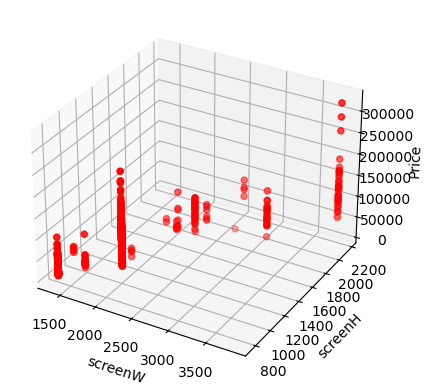

In [290]:

# df = data[["Inches", "resolution_width", "resolution_height","Price"]]
# df.Inches = pd.to_numeric(df.Inches)
# df.resolution_width = pd.to_numeric(df.resolution_width)
# df.resolution_height = pd.to_numeric(df.resolution_height)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(data["resolution_width"],data["resolution_height"],data["Price"],color="red")
ax.set_xlabel("screenW")
ax.set_ylabel("screenH")
ax.set_zlabel("Price")
plt.show()

In [291]:
x = data[["Inches", "resolution_width", "resolution_height"]] # multiple variables as X
y = data['Price']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
# with statsmodels
x = sm.add_constant(x) # adding a constant
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

Intercept: 
 -41930.14946634383
Coefficients: 
 [1427.86497546   37.94452952    7.80262443]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     196.3
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.50e-104
Time:                        22:42:07   Log-Likelihood:                -14952.
No. Observations:                1272   AIC:                         2.991e+04
Df Residuals:                    1268   BIC:                         2.993e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

<h1>Task 2</h1>

In [292]:
data[['RamGB']] = data['Ram'].str.replace('GB', '').to_frame().astype(int)

data = data.dropna()

In [293]:
x = data[["resolution_width", "resolution_height", "RamGB"]] # multiple variables as X
y = data['Price']

x = sm.add_constant(x) # adding a constant
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     549.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          8.74e-229
Time:                        22:42:07   Log-Likelihood:                -14664.
No. Observations:                1272   AIC:                         2.934e+04
Df Residuals:                    1268   BIC:                         2.936e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.857e+04   2750.86